# Gradient Descent: 1 parameter, $ \theta_1 $, or `m`
### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
%matplotlib inline

### Data Generation

In [3]:
m      = 2
x      = np.arange(-5, 5)
y      = np.array([5*n + np.random.normal(0,1) for n in x])
guess  = m * x
losses = (y - (m*x)) ** 2
slopes = (y - (m*x)) * (-2*x)

### Basic Scatter

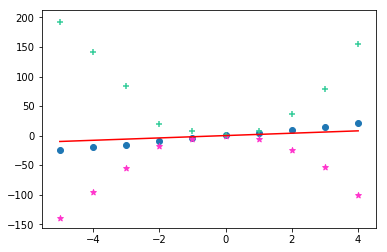

In [4]:
plt.scatter(x,y);
plt.plot(x,guess,c='red');
plt.scatter(x, slopes, c='#ff33cc', marker='*');
plt.scatter(x, losses, c='#33cc99', marker='+');

### Show mean gradients over a range of `m` values

In [5]:
for i in range(3, 7):
    s = (y - (i*x)) * (-2*x)
    print('coefficient:', i, 'total slope:', sum(s))

coefficient: 3 total slope: -324.763646793
coefficient: 4 total slope: -154.763646793
coefficient: 5 total slope: 15.2363532073
coefficient: 6 total slope: 185.236353207


### Function that plots `mean squared error` over a range of $ \theta_1 $ values

In [6]:
def plotter(x, y, m_range):
    mses   = [((y - (m*x)) ** 2).mean()     for m in m_range]
    slopes = [((y - (m*x)) * (-2*x)).mean() for m in m_range]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    ax[0].scatter(m_range, mses)
    ax[0].plot(m_range, slopes, c='#ff33cc', marker='+')
    ax[0].set_xlabel('m')
    ax[0].set_ylabel('mse')
    ax[0].set_title('mse as a function of slope')

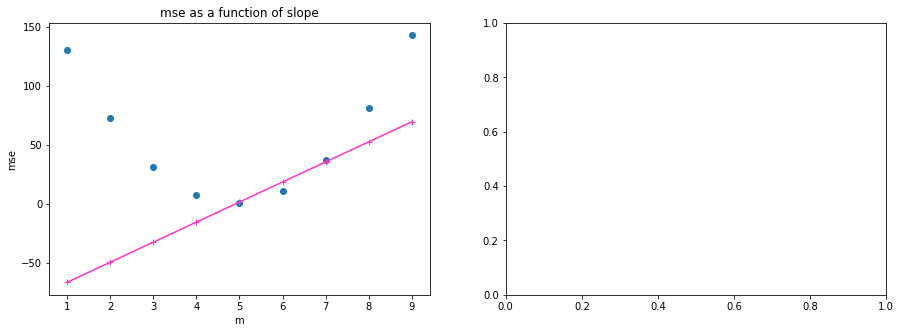

In [7]:
plotter(x, y, range(1, 10))

### Gradient Descent

In [8]:
m = 1
for e in range(20):
    # each epoch runs through full batch of 1 sample
    # compute loss, forward propagation
    mse = ((y - (m*x)) ** 2).mean()
    # average gradient for current `m`
    m_grad = ((y - (m*x)) * (-2*x)).mean()
    # compute the delta
    delta = 0.01 * m_grad
    # update `m`
    m -= delta
    
    print("m: {:.2f} mse: {:.2f} grad: {:.2f}".format(m, mse, m_grad))

m: 1.66 mse: 130.35 grad: -66.48
m: 2.22 mse: 89.91 grad: -55.18
m: 2.67 mse: 62.05 grad: -45.80
m: 3.05 mse: 42.87 grad: -38.01
m: 3.37 mse: 29.65 grad: -31.55
m: 3.63 mse: 20.54 grad: -26.19
m: 3.85 mse: 14.26 grad: -21.73
m: 4.03 mse: 9.94 grad: -18.04
m: 4.18 mse: 6.96 grad: -14.97
m: 4.30 mse: 4.91 grad: -12.43
m: 4.41 mse: 3.50 grad: -10.31
m: 4.49 mse: 2.53 grad: -8.56
m: 4.56 mse: 1.86 grad: -7.11
m: 4.62 mse: 1.39 grad: -5.90
m: 4.67 mse: 1.08 grad: -4.90
m: 4.71 mse: 0.86 grad: -4.06
m: 4.75 mse: 0.71 grad: -3.37
m: 4.77 mse: 0.60 grad: -2.80
m: 4.80 mse: 0.53 grad: -2.32
m: 4.82 mse: 0.48 grad: -1.93
